# Random Forests and Gradient Descent on Absolute Magnitude

We will do the same procedure as in the model_baseline notebook, i.e., splitting the training (Pantheon+) data to validate the model with itself and also use the DES data to test the model afterwards. This notebook will feature slightly more complex models like RandomForestRegressor and XGBRegressor to attempt an even better prediction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import os
import sys
sys.path.append('../src')
from preprocessing import preprocessor_simple, preprocess_des_data

pantheonpluspath = '../data/Pantheon+SH0ES.dat'
despath = '../data/DES-data.csv'

X_train,y_train = preprocessor_simple(pantheonpluspath)
X_test,y_test = preprocess_des_data(despath)


## Random Forest Regressor

This regressor is part of the scikit-learn library.


In [2]:
model1 = RandomForestRegressor(n_estimators = 150,random_state = 1)

model1.fit(X_train,y_train)

ypred1 = model1.predict(X_test)

print(f'MAE with Random Forests : {mean_absolute_error(y_test,ypred1)}')

MAE with Random Forests : 0.18062655112082968


## XGBoost

This regressor uses the method of gradient descent to fit the model.

In [4]:
model2 = XGBRegressor(n_estimators = 150, learning_rate = 0.1)

model2.fit(X_train,y_train)

ypred2 = model2.predict(X_test)

print(f'MAE with XGBoost : {mean_absolute_error(y_test,ypred2)}')

MAE with XGBoost : 0.18520941985116235


Now, I will flip the training and test data for a specific reason. If we look at the redshift range of these datasets,

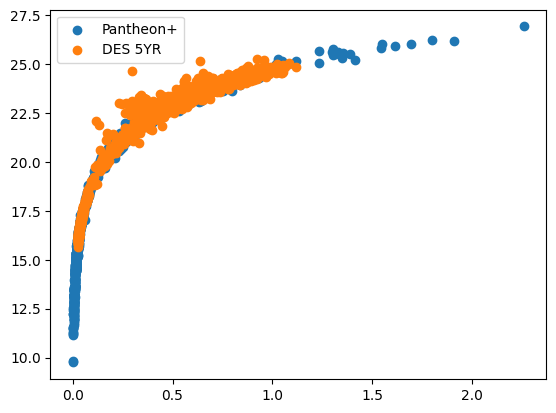

In [17]:
plt.scatter(X_train['zHD'],y_train, label = 'Pantheon+')
plt.scatter(X_test['zHD'],y_test, label = 'DES 5YR')
plt.legend()

We can see that the DES dataset covers a smaller range of redshift that the Pantheon+ dataset. What will really be a test of these methods to predict the apparent magnitude would be training these models on the DES dataset and then testing them against the Pantheon+ data.

In [9]:
model3 = RandomForestRegressor(n_estimators = 150,random_state = 1)
model4 = XGBRegressor(n_estimators = 150, learning_rate = 0.1)

model3.fit(X_test,y_test)
model4.fit(X_test,y_test)

ypreds3 = model3.predict(X_train)
ypreds4 = model4.predict(X_train)

print(mean_absolute_error(y_train,ypreds3))
print(mean_absolute_error(y_train,ypreds4))

0.44393004467960195
0.47610626292538744


Let's plot the results to see the predictions with their real values.

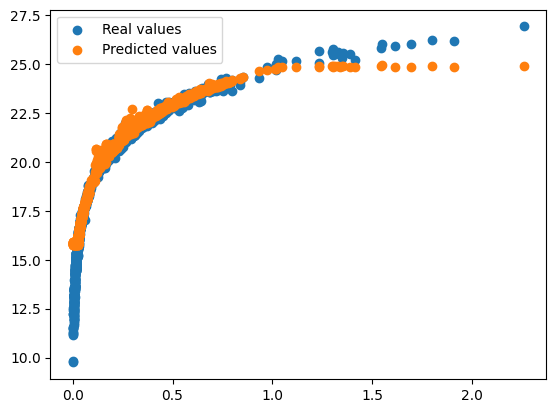

In [15]:
plt.scatter(X_train['zHD'],y_train, label = 'Real values')
plt.scatter(X_train['zHD'],ypreds3, label = 'Predicted values')
plt.legend()

The model seems to perform fine for the data, but will become inaccurate if we venture outside the redshift range of the training data too much.

## Conclusion

The Random Forest Regression and Gradient Descent methods are both really good models to predict the standardized apparent magnitudes of Type Ia supernovae given the redshift, stretch and color, and also do relatively good when tested outside the redshift ranges of the training data as well.

